In [1]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Visual styling
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
print("Libraries Loaded. Ready to board the Titanic.")

Libraries Loaded. Ready to board the Titanic.


First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

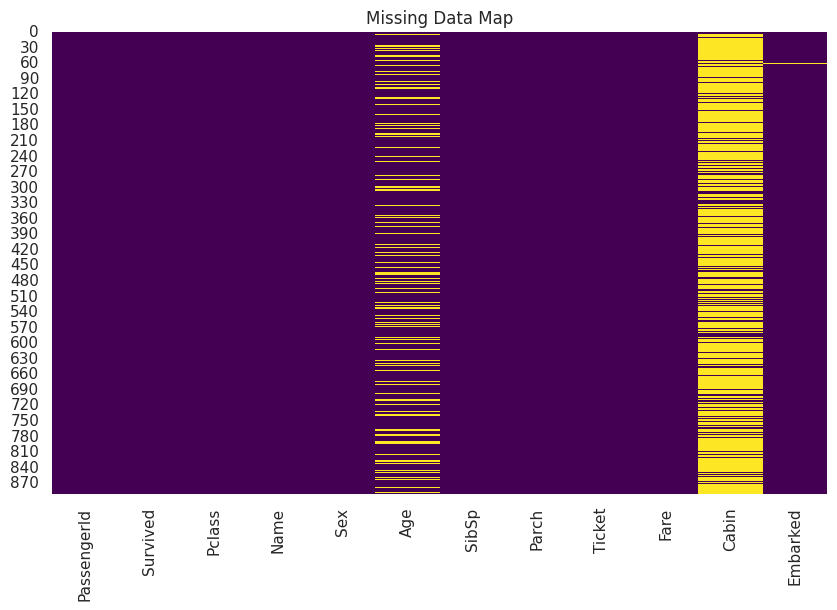

In [2]:
# Cell 2: Load Data
# Loading directly from GitHub (standard Kaggle dataset)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("First 5 rows:")
print(df.head())

# --- THE REALITY CHECK (Missing Data) ---
# In real jobs, data is never perfect. Let's see what's missing.
print("\nMissing Values Count:")
print(df.isnull().sum())

# Visualize missing data (Yellow lines = Missing)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Map")
plt.show()

In [3]:
# Cell 3: Cleaning & Feature Engineering

# 1. Fill missing Age with the average (Median is safer than Mean)
df['Age'] = df['Age'].fillna(df['Age'].median())

# 2. Fill missing Embarked with the most common port ('S')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 3. Drop columns that are too messy or irrelevant for now
# Cabin (too many missing), Name & Ticket (too unique to predict easily)
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# 4. Convert Text to Numbers (Encoding)
# Computers can't read "male", they read "0" or "1".
# drop_first=True prevents "dummy variable trap" (redundancy)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

print("Cleaned Data Preview:")
print(df.head())

Cleaned Data Preview:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


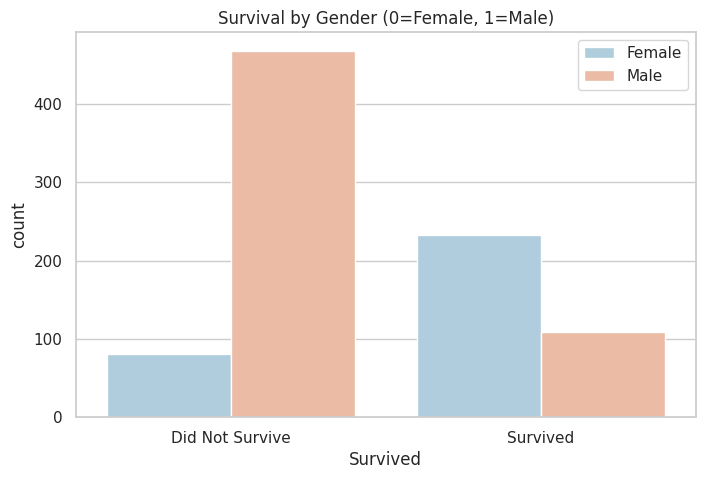

In [4]:
# Cell 4: EDA Visualization
# Sex_male = 1 means Male, 0 means Female (because of get_dummies)

plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex_male', data=df, palette='RdBu_r')
plt.title("Survival by Gender (0=Female, 1=Male)")
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.legend(['Female', 'Male'])
plt.show()

In [5]:
# Cell 5: Train/Test Split & Modeling
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {acc*100:.2f}%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))

Model Accuracy: 82.12%

Confusion Matrix:
 [[91 14]
 [18 56]]


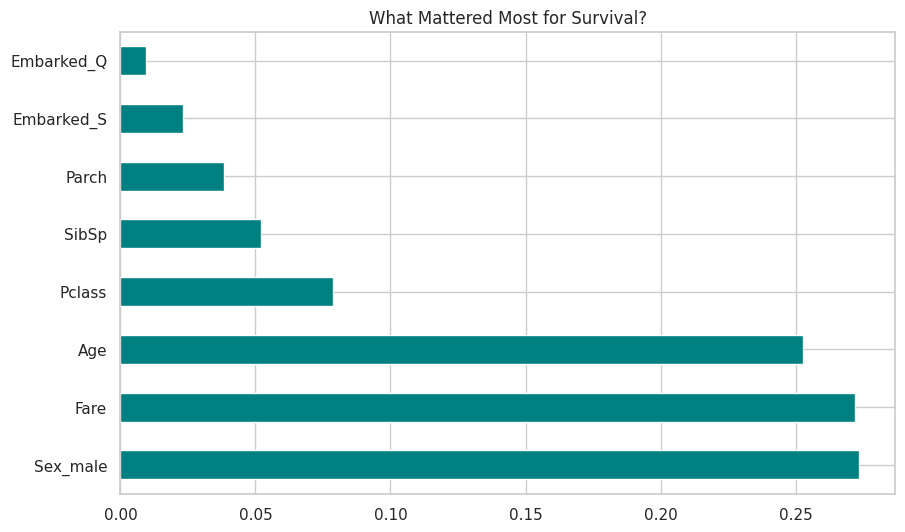

In [6]:
# Cell 6: Feature Importance
import pandas as pd

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh', color='teal')
plt.title("What Mattered Most for Survival?")
plt.show()